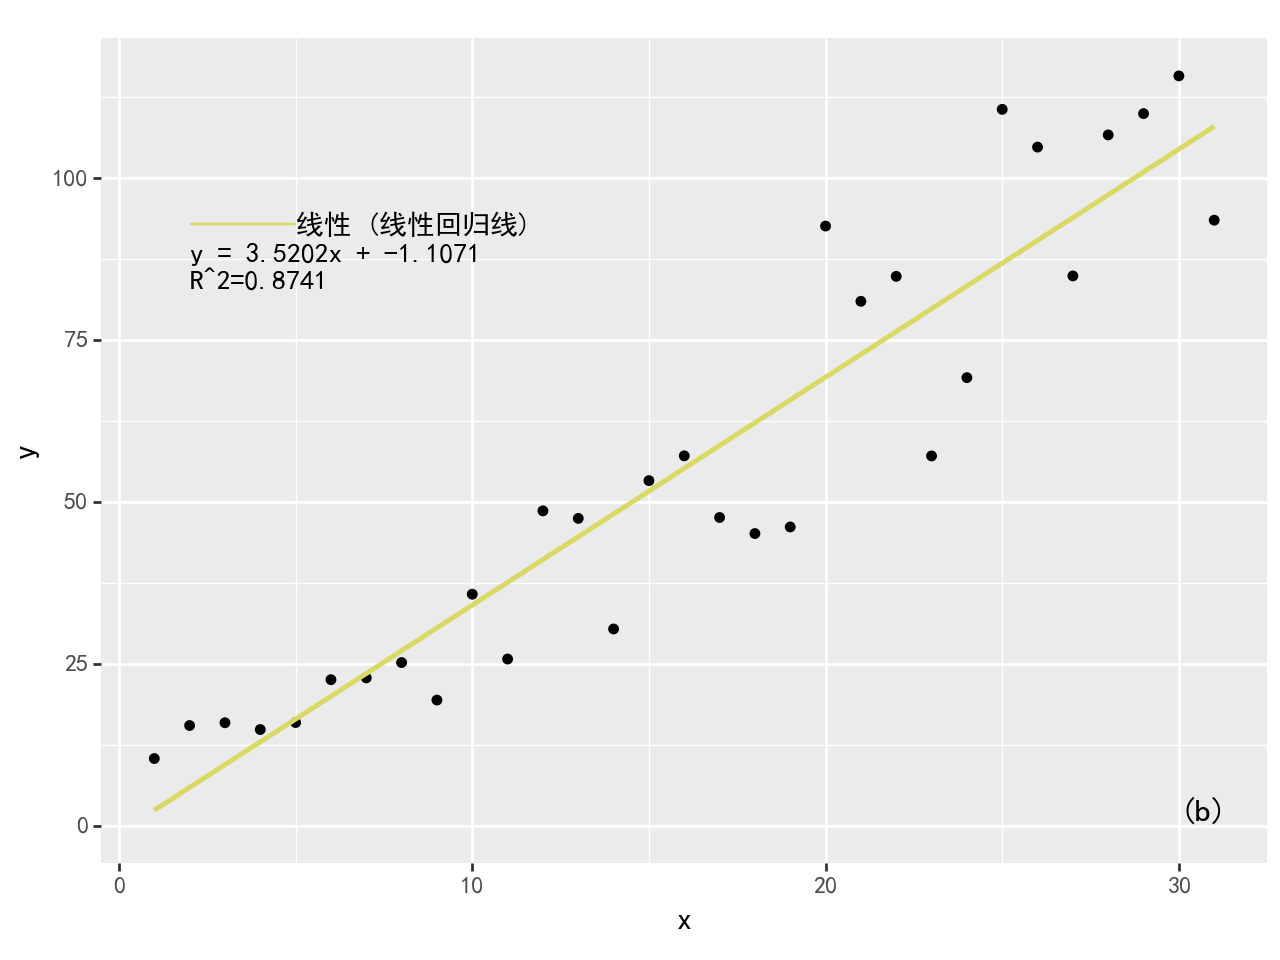

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from plotnine import *
import matplotlib.pyplot as plt
df = pd.read_csv('Scatter_Data.csv')
r, p = sp.stats.pearsonr(df["x"], df["y"])


# 计算线性回归的斜率和截距
slope, intercept = np.polyfit(df["x"], df["y"], 1)
r_squared = r ** 2
equation = f"y = {slope:.4f}x + {intercept:.4f}\nR^2={r_squared:.4f}"

p1 = (
    ggplot(df, aes('x', 'y'))
    + geom_point(colour="black", fill="black", size=1.2)
    + geom_smooth(method='lm',color="#dbd966",  se=False)
    + annotate('line',x=[2,5],y=93,color="#dbd966")
    + annotate('text',x=5,y=95,label="线性 (线性回归线)", ha='left', va='top', size=10, color='black')
    + annotate('text', x=2, y=90, label=equation, ha='left', va='top', size=10, color='black')  # 显示回归方程和R^2
    + annotate('text', x=30, y=0, label="(b)", size=12, ha='left', va='bottom')  # 添加右下角的(b)
    + scale_x_continuous(breaks=np.arange(0, 35, 10))  # 设置x轴刻度
    + scale_y_continuous(breaks=np.arange(0, 150, 25))  # 设置y轴刻度 
    + theme_gray()
    + theme(text=element_text(family="SimHei"))
)
print(p1)


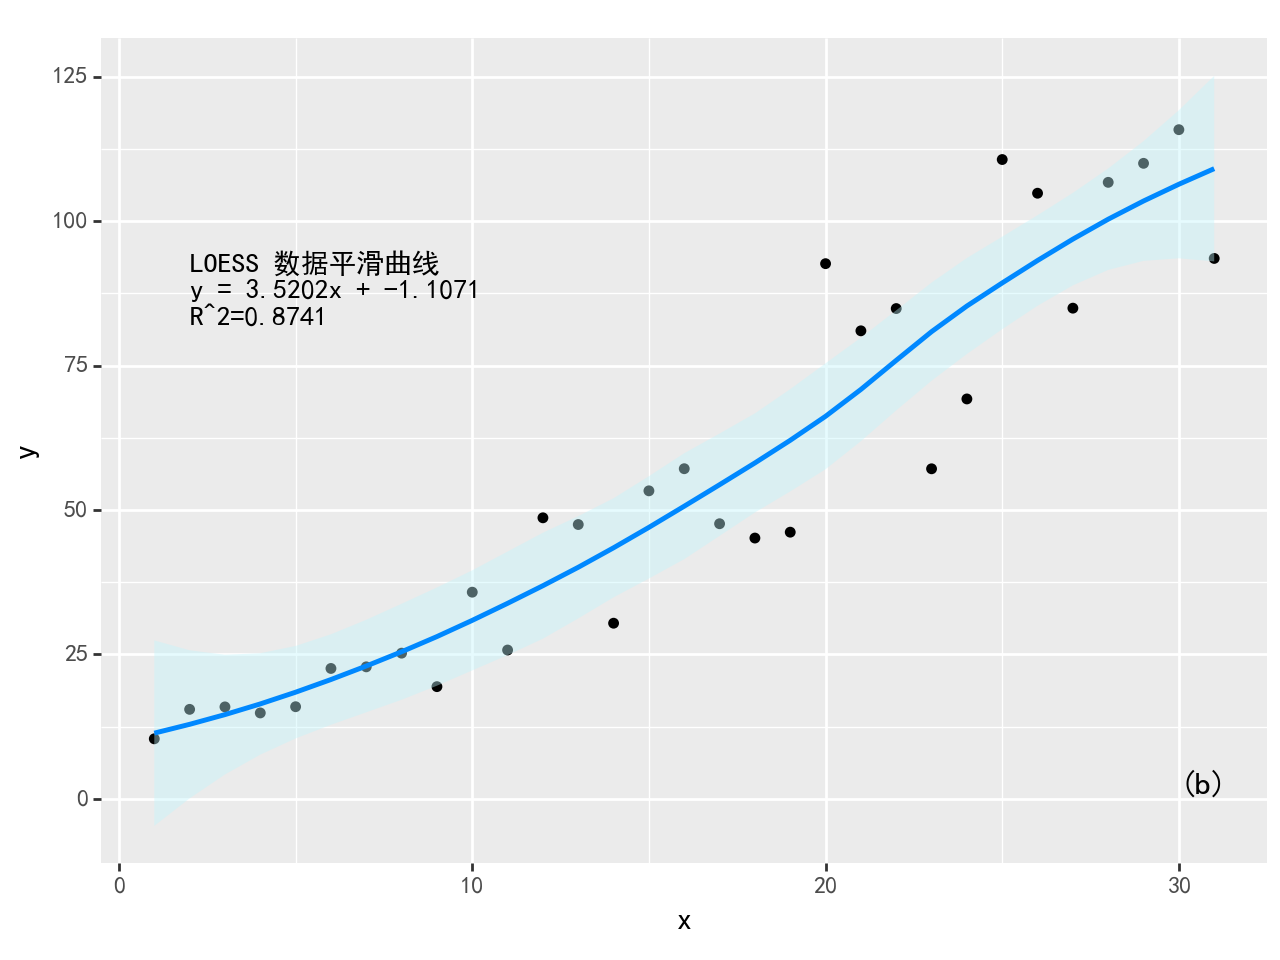

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from plotnine import *
import skmisc

df = pd.read_csv('Scatter_Data.csv')
r, p = sp.stats.pearsonr(df["x"], df["y"])


# 计算线性回归的斜率和截距
slope, intercept = np.polyfit(df["x"], df["y"], 1)
r_squared = r ** 2
equation = f"y = {slope:.4f}x + {intercept:.4f}\nR^2={r_squared:.4f}"

p1 = (
    ggplot(df, aes('x', 'y'))
    + geom_point(colour="black", fill="black", size=1.2)
    + geom_smooth(method='loess',color="#0088ff",  fill="#c2f6fd")
     + annotate('text', x=2, y=95, label="LOESS 数据平滑曲线", ha='left', va='top', size=10, color='black')
    + annotate('text', x=2, y=90, label=equation, ha='left', va='top', size=10, color='black')  # 显示回归方程和R^2
    + annotate('text', x=30, y=0, label="(b)", size=12, ha='left', va='bottom')  # 添加右下角的(b)
    + scale_x_continuous(breaks=np.arange(0, 35, 10))  # 设置x轴刻度
    + scale_y_continuous(breaks=np.arange(0, 150, 25))  # 设置y轴刻度
    + theme_gray()
    + theme(text=element_text(family="SimHei"))
)
print(p1)


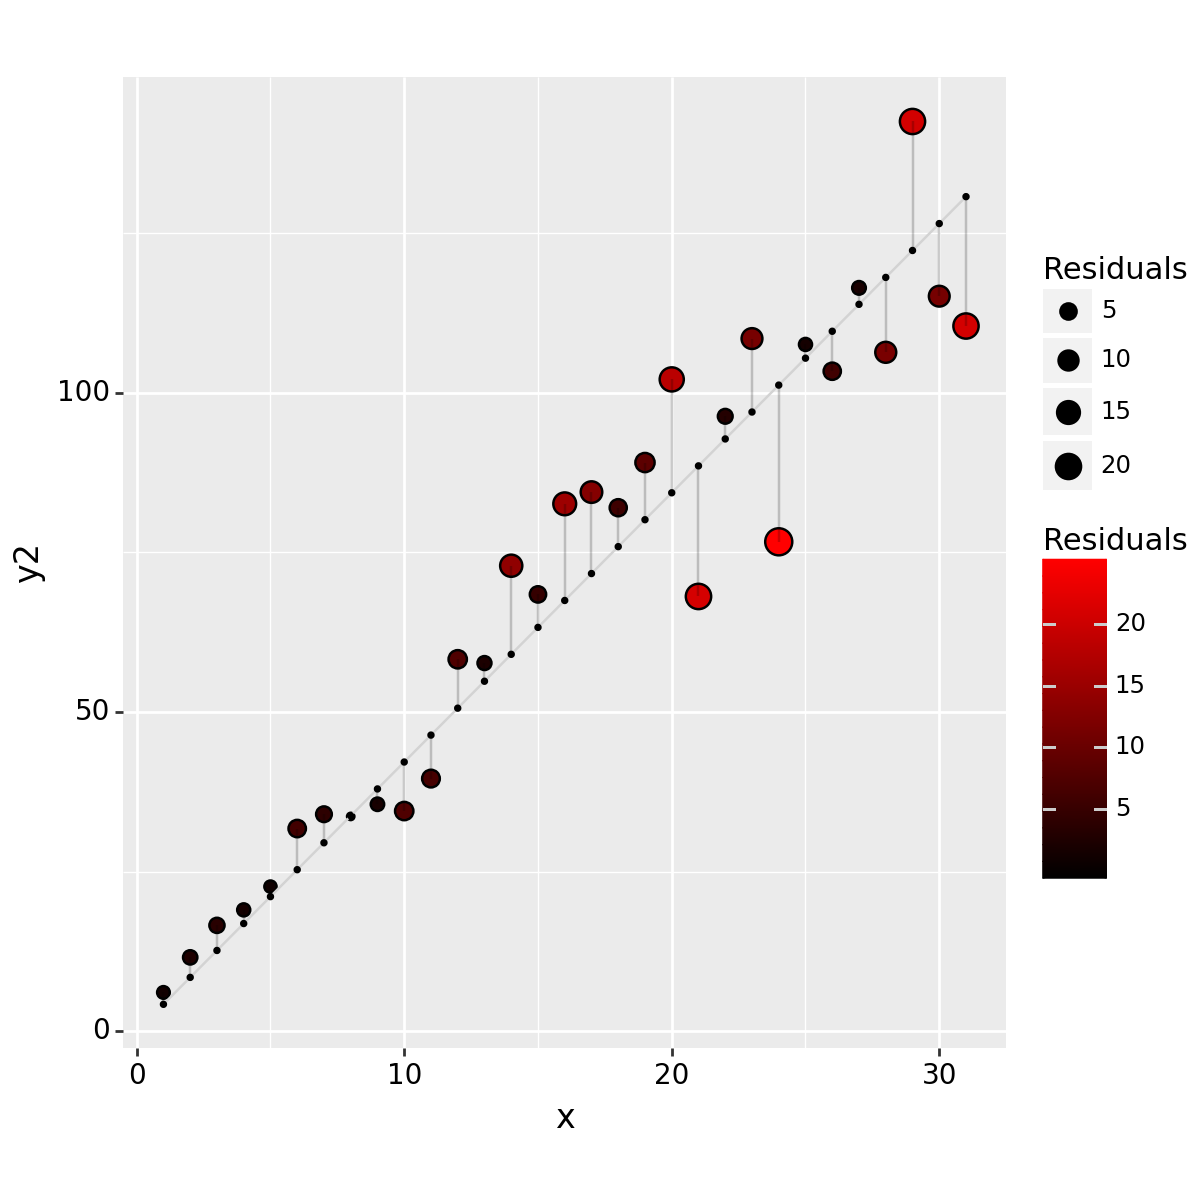

In [86]:
import numpy as np
import pandas as pd
from plotnine import *
import statsmodels.api as sm

# 读取残差分析数据
df = pd.read_csv('Residual_Analysis_Data.csv')

# 使用最小二乘法进行线性回归拟合
results = sm.OLS(df['y2'], df['x']).fit()

# 计算预测值
df['predicted'] = results.predict()

# 计算残差
df['residuals'] = df['predicted'] - df['y2']

# 计算绝对残差
df['Residuals'] = np.abs(df['residuals'])

# 绘制残差分析图
base_Residuals = (
    ggplot(df, aes(x='x', y='y2'))
    + geom_point(aes(fill='Residuals', size='Residuals'), shape='o', color='black')  
    + geom_line(aes(y='predicted'), color='lightgrey')
    + geom_point(aes(y='predicted'), shape='.', color='black')
    + geom_segment(aes(xend='x', yend='predicted'), alpha=0.2)
    + scale_size_continuous(range=(1, 5))  # 设置大小范围
    + scale_fill_gradientn(colors=["black", "red"])
    + theme(
        axis_title=element_text(size=12, face='plain', color='black'),
        axis_text=element_text(size=10, face='plain', color='black'),
        aspect_ratio=1.1,
        figure_size=(6, 6),
        dpi=100,
        legend_position='right',  # 将图例放置在右侧
        legend_box='vertical',  # 使图例垂直排列
        legend_direction='vertical'  # 确保图例垂直排列

    )
)

# 打印残差分析图
print(base_Residuals)


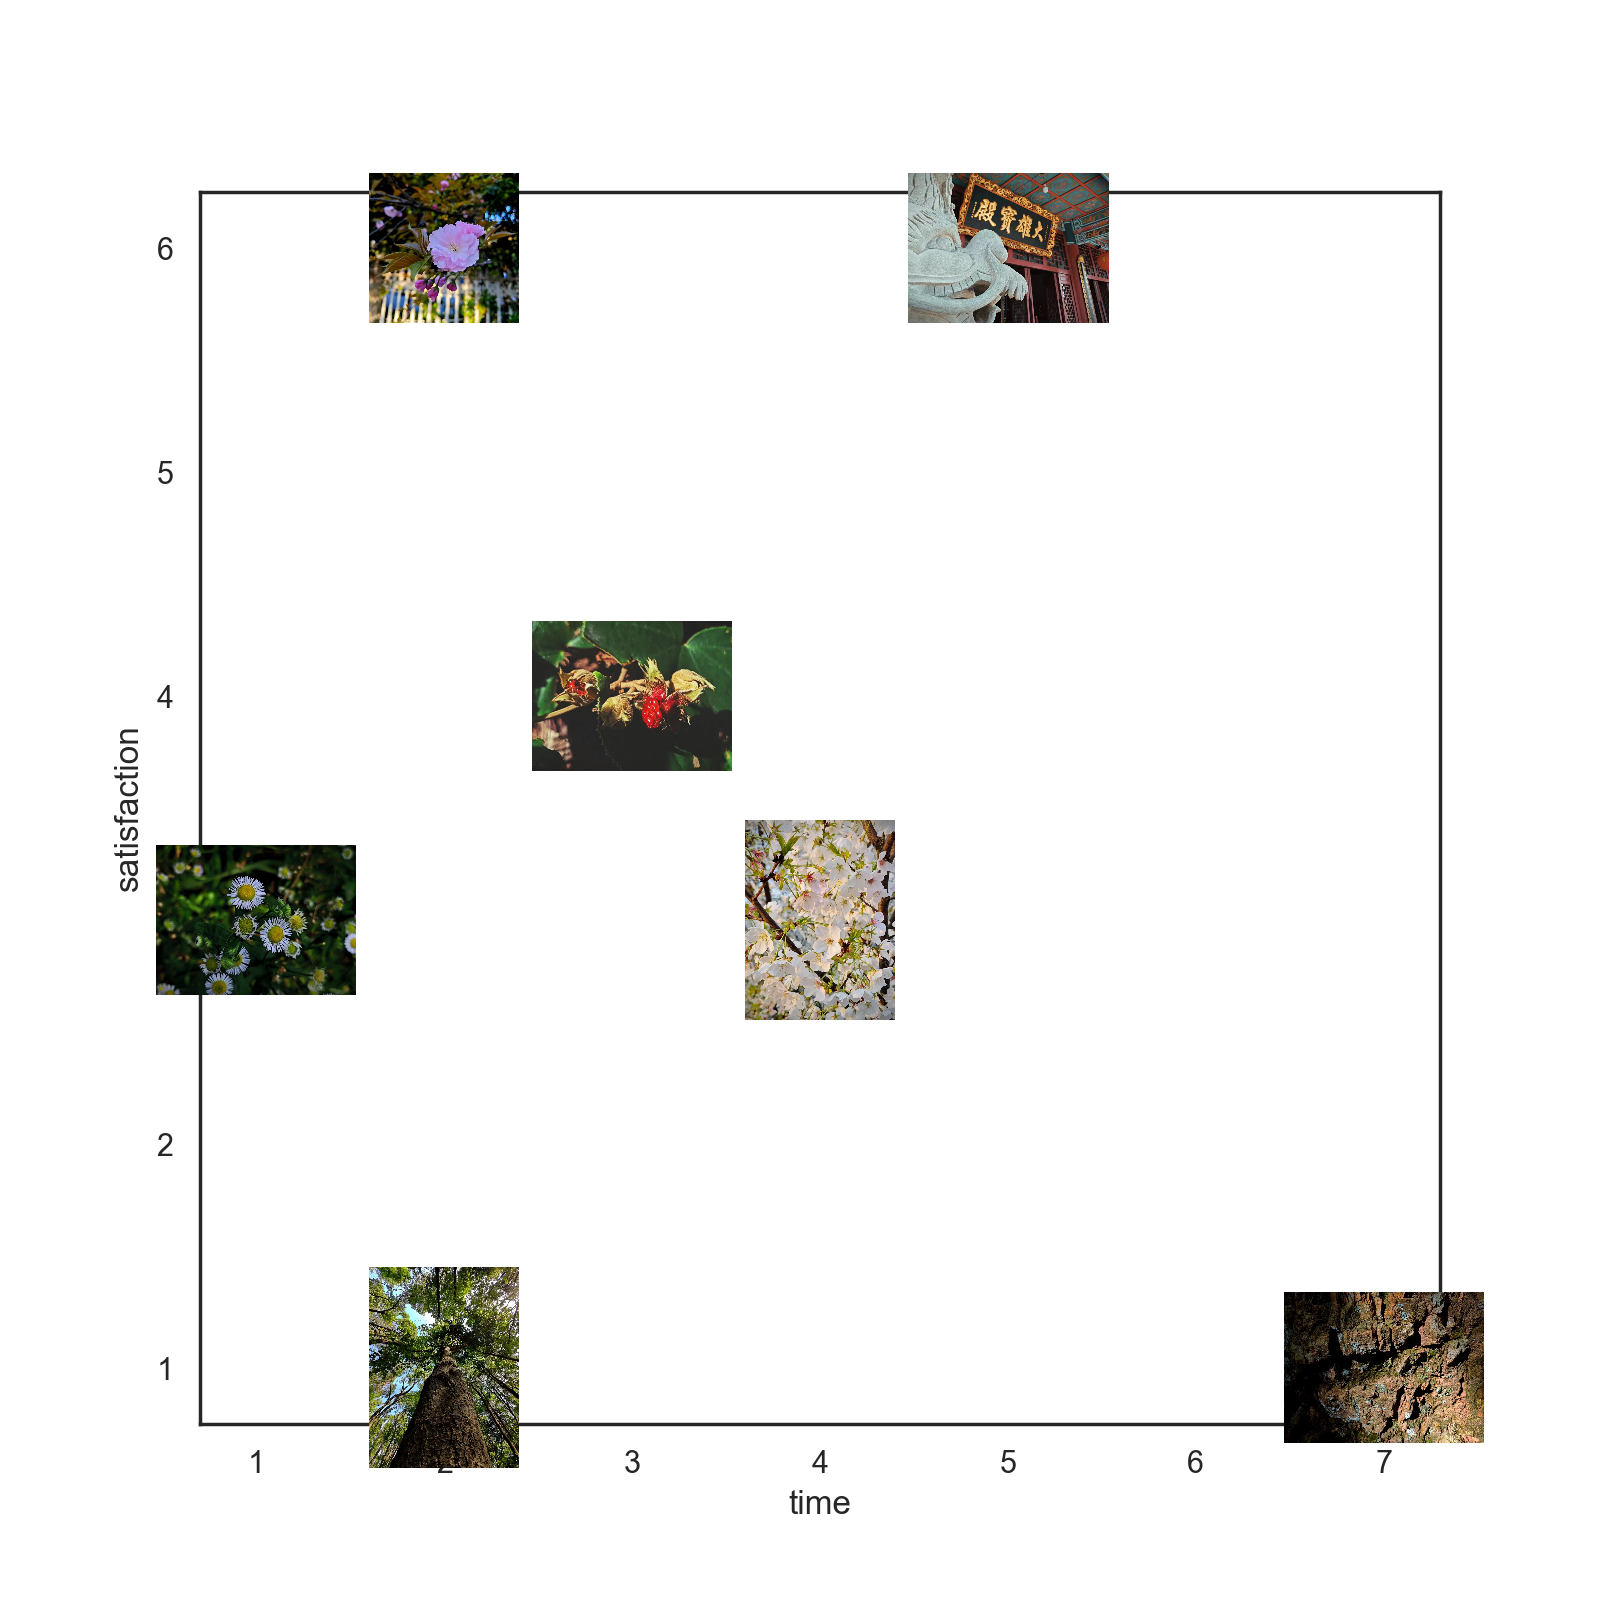

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#读取数据
data=pd.read_csv('data1.csv')
#读取图片
image_paths =['i1.jpg','i2.jpg','i3.jpg','i4.jpg','i5.jpg','i6.jpg','i7.jpg']
images = [Image.open(path) for path in image_paths]
# 将图片转换为OffsetImage格式
offset_images = [OffsetImage(img, zoom=0.05) for img in images]
sns.set(style='white')

fig, ax = plt.subplots(figsize=(8,8), dpi=100)
ax.scatter(x=data['x'],y=data['y'])
plt.xlabel('time')
plt.ylabel('satisfaction')
# 在每个点的位置添加图片
for x0, y0, im in zip(data['x'], data['y'], offset_images):
    ab = AnnotationBbox(im, (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.show()



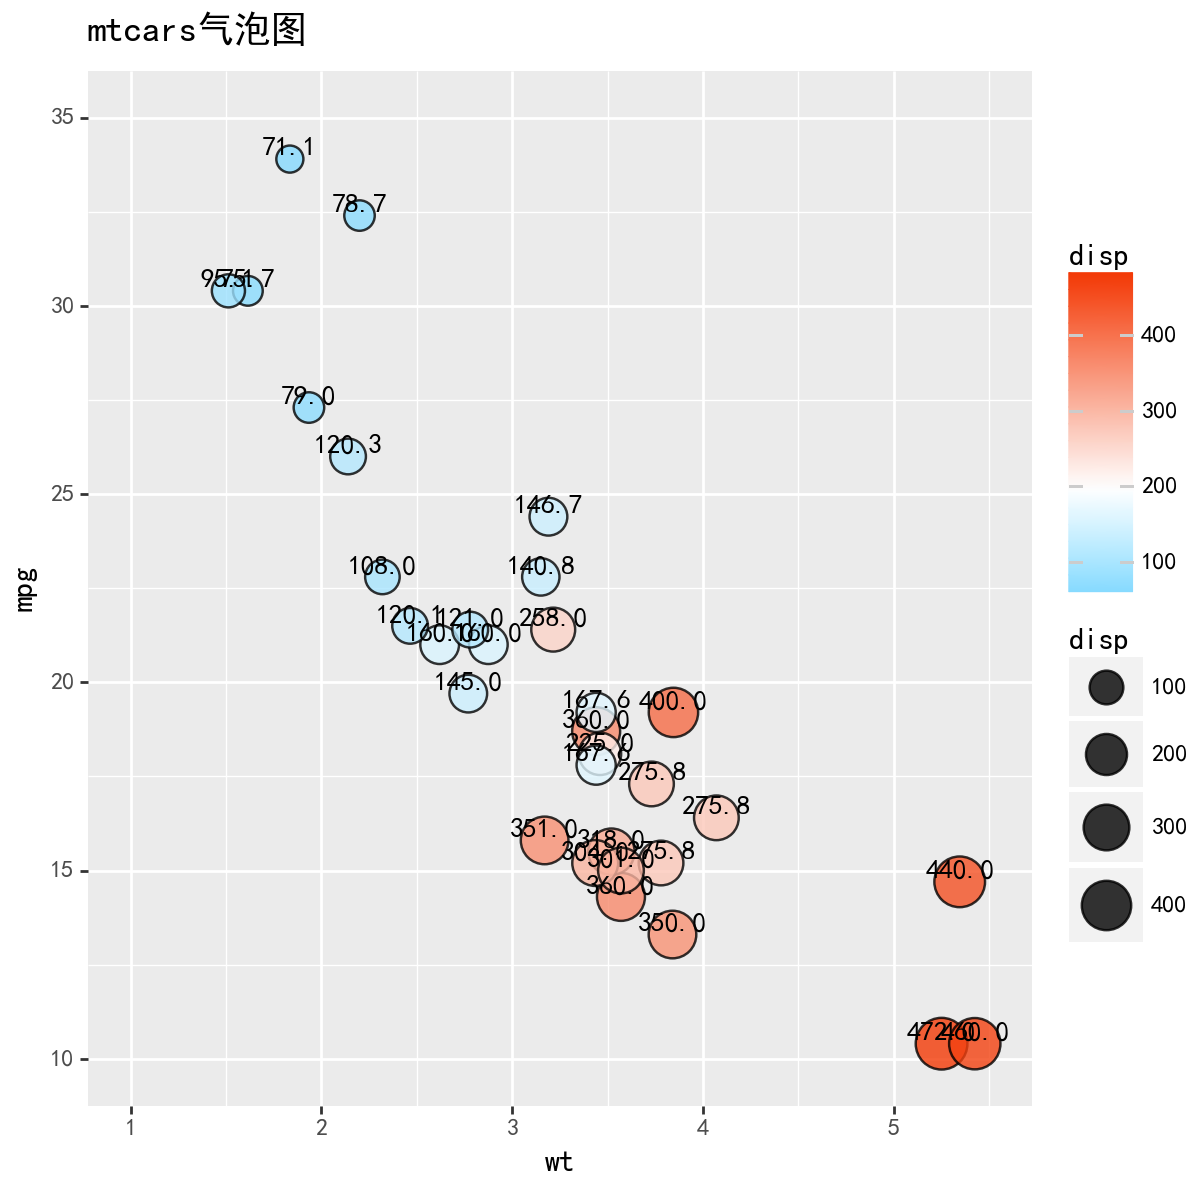

In [4]:
import plotnine as pn
from plotnine.data import mtcars

# 创建绘图对象
p = (
    pn.ggplot(mtcars, pn.aes(x='wt', y='mpg'))
    + pn.geom_point(pn.aes(size='disp', fill='disp'), color='black', alpha=0.8, shape='o',stroke=0.5)  # 使用fill填充，color控制边框
    + pn.geom_text(pn.aes(label='disp'), va='bottom', size=10, color='black') 
    # 设置主题为网格背景
    + pn.theme(
        panel_grid_major=pn.element_line(color="white", linetype="solid"), 
        panel_grid_minor=pn.element_line(color="white", linetype="solid"), 
        text=pn.element_text(family="SimHei"),
        figure_size=(6, 6)
    )
    # 设置坐标轴范围
    + pn.coord_cartesian(xlim=(1, 5.5), ylim=(10, 35))
    # 使用 scale_color_gradient2 实现蓝到白再到红的渐变
    + pn.scale_fill_gradient2(low="#00b2ff", mid="white", high="#f33906", midpoint=200)
    + pn.scale_size_continuous(range=[5, 10])  # 调整气泡大小范围
    # 标题和其他文本元素
    + pn.labs(
        title='mtcars气泡图',
        x='wt',
        y='mpg'
    )
)

# 绘制图形
print(p)


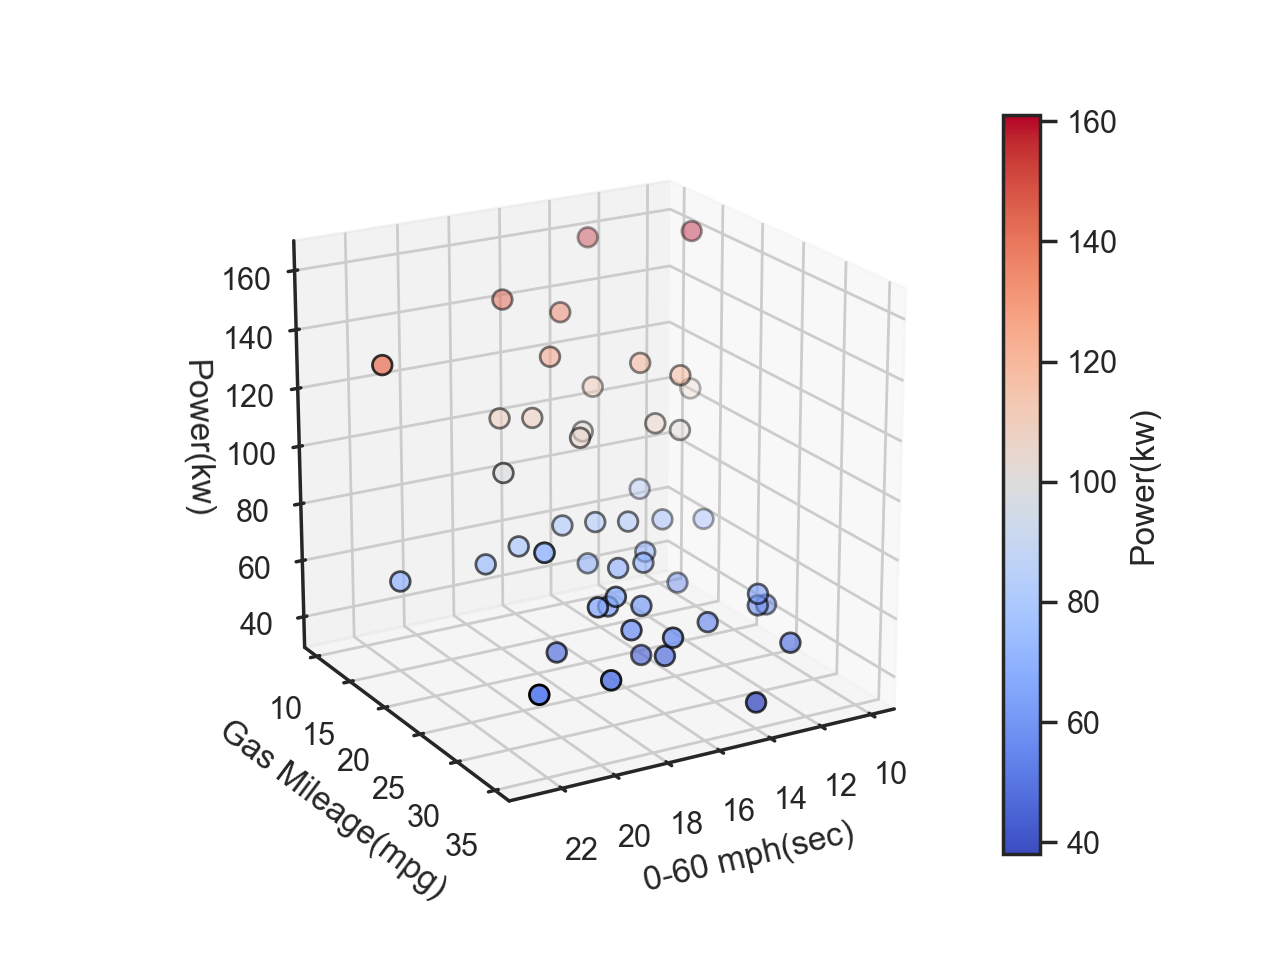

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('ThreeD_Scatter_Data.csv')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 


scatter = ax.scatter3D(df['mph'], df['Gas_Mileage'], df['Power'],
                       c=df['Power'], cmap='coolwarm', s=50,
                       edgecolors='black')  


ax.set_xlabel('0-60 mph(sec)')
ax.set_ylabel('Gas Mileage(mpg)')
ax.set_zlabel('Power(kw)')
ax.set_box_aspect([1, 1, 1])  

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Power(kw)')
ax.view_init(elev=20, azim=60)

plt.show()


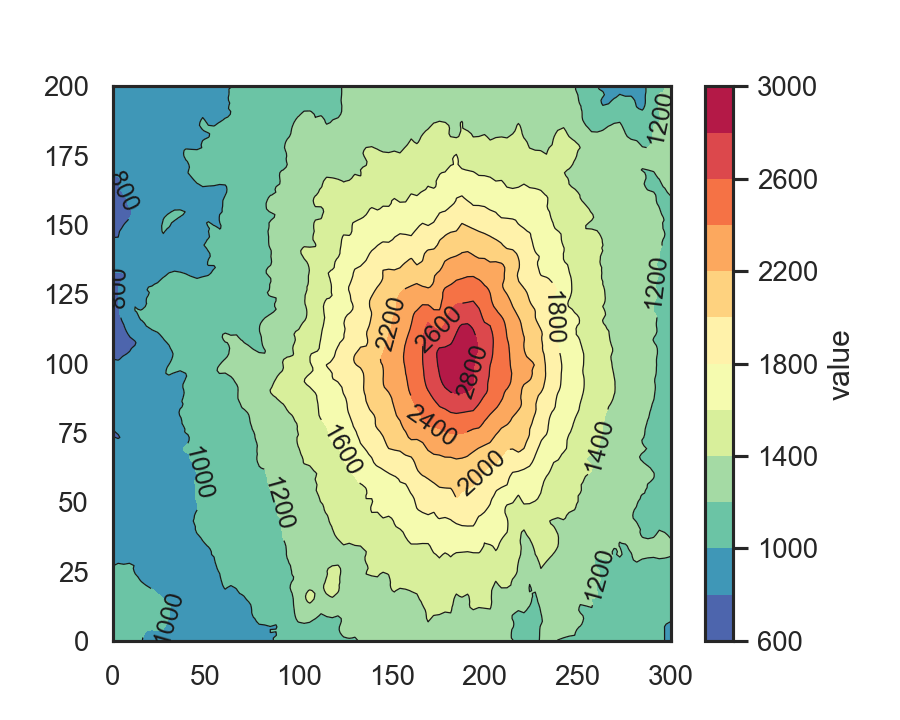

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.tri as tri
from matplotlib.pyplot import figure, show, rc

mpl.rc('font',size=10)

df=pd.DataFrame(np.loadtxt('等高线.txt'))
df=df.reset_index()
map_df=pd.melt(df,id_vars='index',var_name='var',value_name='value')
map_df['var']=map_df['var'].astype(int)

ngridx = 100  #定义x方向的网格数
ngridy = 200  #定义y方向的网格数

xi = np.linspace(0, 300, ngridx)  #生成x方向的线性等分的值
yi = np.linspace(0, 200, ngridy)  #生成y方向的线性等分的值

triang = tri.Triangulation(map_df['index'], map_df['var'])
interpolator = tri.LinearTriInterpolator(triang, map_df['value'])
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)
# 带标签的等高线图
fig, ax = plt.subplots(figsize=(5,4),dpi =90)  

CS=ax.contour(xi, yi, zi, levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(xi, yi, zi, levels=10, cmap="Spectral_r")
fig.colorbar(cntr,ax=ax,label="value")                
CS.levels = [int(val) for val in cntr.levels]
ax.clabel(CS, CS.levels, fmt='%.0f', inline=True,  fontsize=10)
plt.show()